# Question 2

In [490]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [491]:
# Calculte chi-square value
def chi_square(observed, expected, error):
    return np.sum((observed - expected)**2 / error**2)

In [492]:
# Read data
filepath = "DataHandIn1_2024.txt"
data = pd.read_csv(filepath, sep=",", header=0)
data.head()

# 1st column: Frequency (kHz)
# 2nd column: Ua (mV)
# 3rd column: Ub (mV)
# 4th column: sigma_Ua (mV)
# 5th column: sigma_Ub (mV)

,freq_kHz,Ua_mV,Ub_mv,sigma_Ua_mV,sigma_Ub_mV
0,1.0,117.0,5.0,0.1,0.8
1,2.0,127.2,16.7,0.1,0.1
2,3.0,148.4,42.6,0.1,0.1
3,4.0,193.7,97.2,0.1,0.1
4,4.5,235.3,147.8,0.1,0.1


In [493]:
# Seperate values into individual np.arrays
f_arr = data.iloc[:,0].values
Ua_arr = data.iloc[:,1].values
Ub_arr = data.iloc[:,2].values
sigma_Ua_arr = data.iloc[:,3].values
sigma_Ub_arr = data.iloc[:,4].values

# Convert to SI units
f_arr = f_arr * 1e3
Ua_arr = Ua_arr * 1e-3
Ub_arr = Ub_arr * 1e-3
sigma_Ua_arr = sigma_Ua_arr * 1e-3
sigma_Ub_arr = sigma_Ub_arr * 1e-3


In [494]:
# Values of the components in the circuit
U_sg = 114.5e-3 # V

R_sg = 50 # Ohm
R = 39.1 # Ohm
C = 47e-9 # F

In [495]:
# Calculates I_1 from the frequency of the current
def I_1(U_A, freq):
    return U_A / np.sqrt(R**2 + 1/(2*np.pi*freq*C)**2)

# Error propagation for I_1
def sigma_I_1(sigma_U_A, freq):
    return abs(1/(np.sqrt(R**2 + 1/(2*np.pi*freq*C)**2)) * sigma_U_A)

# A lorentzian function for fits
def lorentzian(f, f_0, A, gamma):
    return A / (1 + ((f - f_0) / gamma)**2)

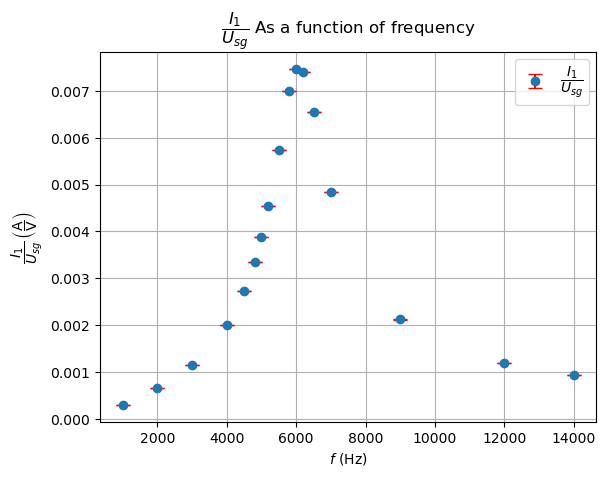

In [496]:
# Plot I_1/U_sg as a function of frequency
plt.errorbar(f_arr, I_1(Ua_arr, f_arr)/U_sg, ecolor="red", capsize=5, yerr=sigma_I_1(sigma_Ua_arr, f_arr)/U_sg, fmt='o', label=r"$\dfrac{I_1}{U_{sg}}$")
plt.xlabel(r"$f$ (Hz)")
plt.ylabel(r"$\dfrac{I_1}{U_{sg}} \, \left(\dfrac{\text{A}}{\text{V}}\right)$")
plt.title(r"$\dfrac{I_1}{U_{sg}}$ As a function of frequency")
plt.grid()
plt.legend(loc="upper right")

plt.show()

# Question 3

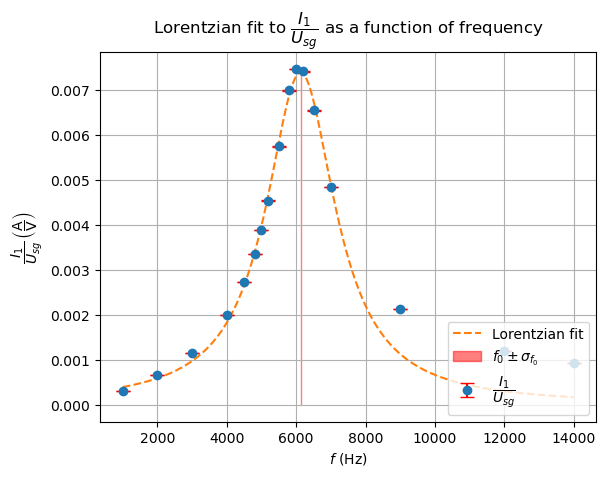

f_0 = 6128.7636687391905 +- 0.19580104255842254
A = 0.007382561705809157 +- 8.214683139678937e-07
gamma = 1221.2112527559555 +- 0.2315721368861948
Chi-square value: 598129.95466976


In [497]:
# Fit a Lorentzian to I_1/U_sg as a function of frequency
popt, pcov = curve_fit(lorentzian, f_arr, I_1(Ua_arr, f_arr)/U_sg, sigma=sigma_I_1(sigma_Ua_arr, f_arr)/U_sg, p0=[6000, 0.007, 0.1], absolute_sigma=True, maxfev=10000)

f_0 = popt[0]
A = popt[1]
gamma = popt[2]

# Calculate uncertainty on the parameters
perr = np.sqrt(np.diag(pcov))

f_0_error = perr[0]
A_error = perr[1]
gamma_error = perr[2]

# Plot the fit
X = np.linspace(f_arr.min(), f_arr.max(), 1000)

plt.errorbar(f_arr, I_1(Ua_arr, f_arr)/U_sg, ecolor="red", capsize=5, yerr=sigma_I_1(sigma_Ua_arr, f_arr)/U_sg, fmt='o', label=r"$\dfrac{I_1}{U_{sg}}$")
plt.plot(X, lorentzian(X, *popt), linestyle="dashed", label=r"Lorentzian fit")
# Add a line showing the resonance frequency
#plt.axvline(x=f_0, color="black", linestyle="dotted", label=r"$f_0$")
# Show the uncertainty on the resonance frequency
plt.fill_between([f_0 - f_0_error, f_0 + f_0_error], 0, max(I_1(Ua_arr, f_arr)/U_sg), color="red", alpha=0.5, label=r"$f_0 \pm \sigma_{f_0}$")

plt.xlabel(r"$f$ (Hz)")
plt.ylabel(r"$\dfrac{I_1}{U_{sg}}  \, \left(\dfrac{\text{A}}{\text{V}}\right)$")
plt.title(r"Lorentzian fit to $\dfrac{I_1}{U_{sg}}$ as a function of frequency")
plt.grid()
plt.legend(loc="lower right")
plt.show()

# Print the parameters of the fit
print(f"f_0 = {f_0} +- {f_0_error}")
print(f"A = {A} +- {A_error}")
print(f"gamma = {gamma} +- {gamma_error}")


# Calculate the chi-square value
chi_sq = chi_square(I_1(Ua_arr, f_arr)/U_sg, lorentzian(f_arr, *popt), sigma_I_1(sigma_Ua_arr, f_arr)/U_sg)
print(f"Chi-square value: {chi_sq}")


# Question 6

In [498]:
# Find the value and error on I_1 at the resonance frequency f_0:

I_1_f_0 = lorentzian(f_0, *popt) * U_sg

I_1_f_0_error = U_sg / (I_1_f_0**2) * A_error

print(f"I_1(f_0) = {I_1_f_0} +- {I_1_f_0_error}")



I_1(f_0) = 0.0008453033153151485 +- 0.13163493350025976


In [499]:
R_L = U_sg / (I_1_f_0) - R_sg - R

R_L_error = (U_sg/(I_1_f_0))**2*A_error

print(f"R_L = {R_L} +- {R_L_error}")

R_L = 46.35433683447908 +- 0.015072199885779744


# Question 7

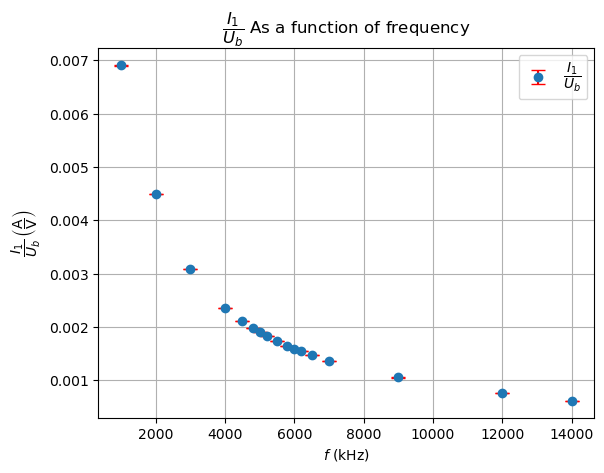

In [500]:
# Plot I_1/Ub as a function of frequency
plt.errorbar(f_arr, I_1(Ua_arr, f_arr)/Ub_arr, ecolor="red", capsize=5, yerr=sigma_I_1(sigma_Ua_arr, f_arr)/Ub_arr, fmt='o', label=r"$\dfrac{I_1}{U_b}$")
plt.xlabel(r"$f$ (kHz)")
plt.ylabel(r"$\dfrac{I_1}{U_b} \, \left(\dfrac{\text{A}}{\text{V}}\right)$")
plt.title(r"$\dfrac{I_1}{U_b}$ As a function of frequency")
plt.grid()
plt.legend(loc="upper right")
plt.show()

In [501]:
# Exponential function for fit
def exponential(f, a, b):
    return b * np.exp(a * f)

# Reciprocal function for fit
def reciprocal(f, k):
    return k / f

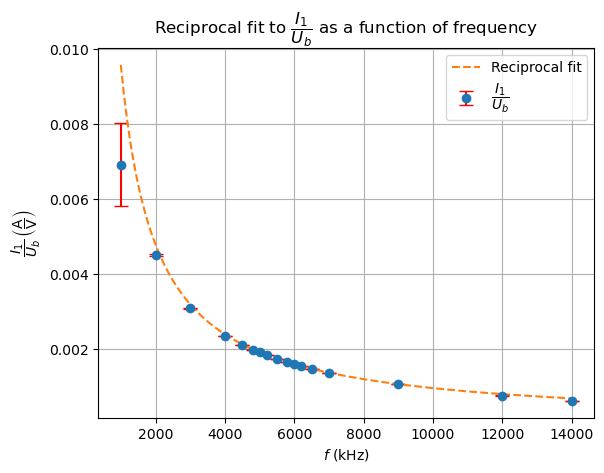

a = 9.56948280585799 +- 0.0011190746856551
Chi-square value: 2107.246273682023


In [502]:
# Error propagation on I_1/Ub
def sigma_I_1_over_U_b(I_1, U_B, sigma_U_A, sigma_U_B, freq):
    return np.sqrt( (sigma_I_1(sigma_U_A, freq) / U_B)**2 + ((I_1/(U_B**2)) * sigma_U_B)**2 )

# Calculate errors
sigma_I_1_over_U_b_arr = sigma_I_1_over_U_b(I_1(Ua_arr, f_arr), Ub_arr, sigma_Ua_arr, sigma_Ub_arr, f_arr)

# Fit a reciprocal function to I_1/Ub as a function of frequency
popt, pcov = curve_fit(reciprocal, f_arr, I_1(Ua_arr, f_arr)/Ub_arr, sigma=sigma_I_1_over_U_b_arr, p0=[1], absolute_sigma=True)

k = popt[0]

# Calculate uncertainty on the parameters
perr = np.sqrt(np.diag(pcov))

k_error = perr[0]

# Plot the fit 
X = np.linspace(f_arr.min(), f_arr.max(), 1000)

plt.errorbar(f_arr, I_1(Ua_arr, f_arr)/Ub_arr, ecolor="red", capsize=5, yerr=sigma_I_1_over_U_b_arr, fmt='o', label=r"$\dfrac{I_1}{U_b}$")
plt.plot(X, reciprocal(X, *popt), linestyle="dashed", label=r"Reciprocal fit")
plt.xlabel(r"$f$ (kHz)")
plt.ylabel(r"$\dfrac{I_1}{U_b} \, \left(\dfrac{\text{A}}{\text{V}}\right)$")
plt.title(r"Reciprocal fit to $\dfrac{I_1}{U_b}$ as a function of frequency")
plt.grid()
plt.legend(loc="upper right")
plt.show()

# Print the parameters of the fit
print(f"a = {k} +- {k_error}")

# Calculate the chi-square value
chi_sq = chi_square(I_1(Ua_arr, f_arr)/Ub_arr, reciprocal(f_arr, *popt), sigma_I_1_over_U_b_arr)
print(f"Chi-square value: {chi_sq}")

In [503]:
M = 1/(2*np.pi*k)
M_error = 1/(2*np.pi*k**2) * k_error

print(f"M = {M} +- {M_error}")


M = 0.016631509384652233 +- 1.9449223656273464e-06


# Question 9

In [507]:
L_1 = 14.3456e-3

L_1_error = 0.0009e-3

L_2_min = M**2/(14.3456e-3)

L_2_min_error = np.sqrt((2* (M/L_1) * M_error)**2 + ((M/L_1)**2 * L_1_error)**2)

print(f"L_2_min = {L_2_min} +- {L_2_min_error}")


L_2_min = 0.019281668554244874 +- 4.6690981296452614e-06
